In [1]:
# Import Pandas Module - Remember to use pip to install it into your active environment
import pandas as pd

# Read cvs into a dataframe, setting the index column then transpost it to the correct format: Col - Nations, Rows - Deaths per day
df = pd.read_csv('covid.csv', index_col='COUNTRY_NAME').transpose()
df

COUNTRY_NAME,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
2020-03,0,0,0,0,0,2,1,0,0,0,0,0,0
2020-04,2,0,3,16,0,5,3,0,28,0,29,16,0
2020-05,22,0,8,47,6,0,17,1,45,10,267,5,0
2020-06,30,0,92,84,14,0,13,1,17,28,306,0,0
2020-07,5,0,171,193,86,0,5,3,3,8,148,0,4
2020-08,1,0,535,236,86,0,1,11,0,1,71,0,28
2020-09,1,0,389,134,38,0,2,13,6,2,13,0,43
2020-10,0,0,271,285,14,0,2,6,5,9,1,0,37
2020-11,0,0,240,473,7,0,5,14,9,3,428,0,93
2020-12,0,3,214,201,10,0,6,43,17,2,311,0,60


In [2]:
s = df.loc['2020-08']
s

COUNTRY_NAME
Djibouti         1
Eritrea          0
Ethiopia       535
Kenya          236
Madagascar      86
Mauritius        0
Mayotte          1
Rwanda          11
Somalia          0
South Sudan      1
Sudan           71
Tanzania         0
Uganda          28
Name: 2020-08, dtype: int64

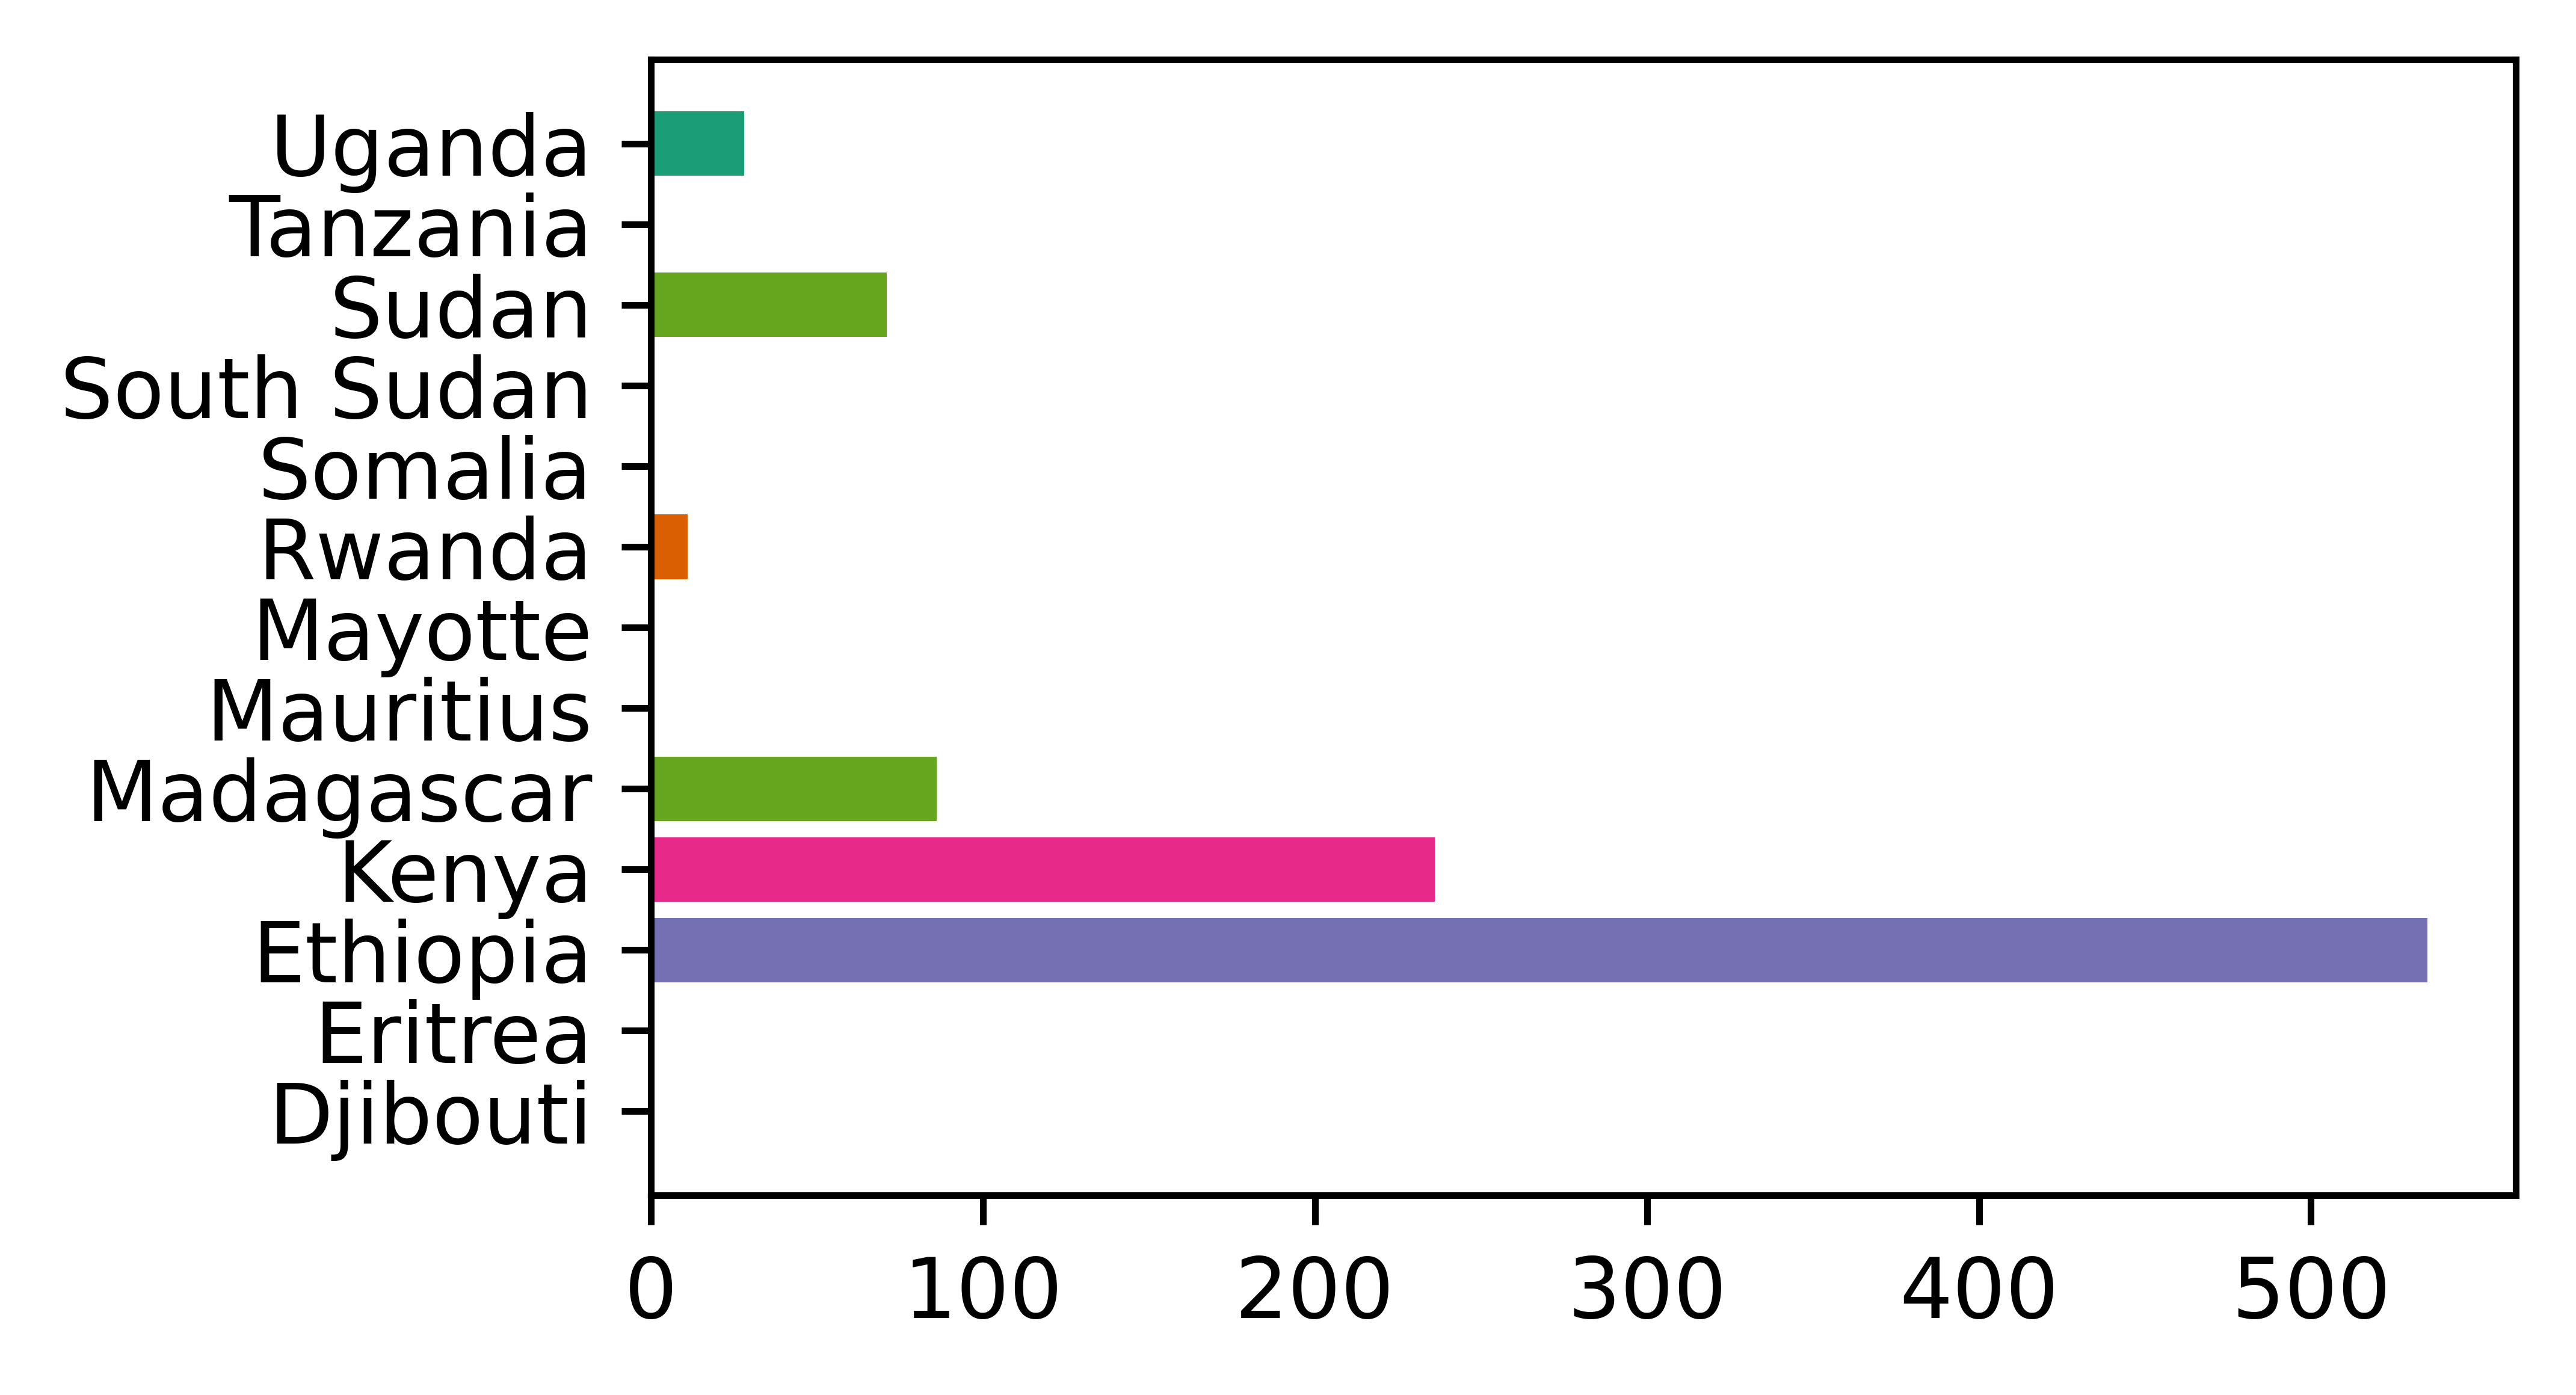

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 2.5), dpi=1000)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

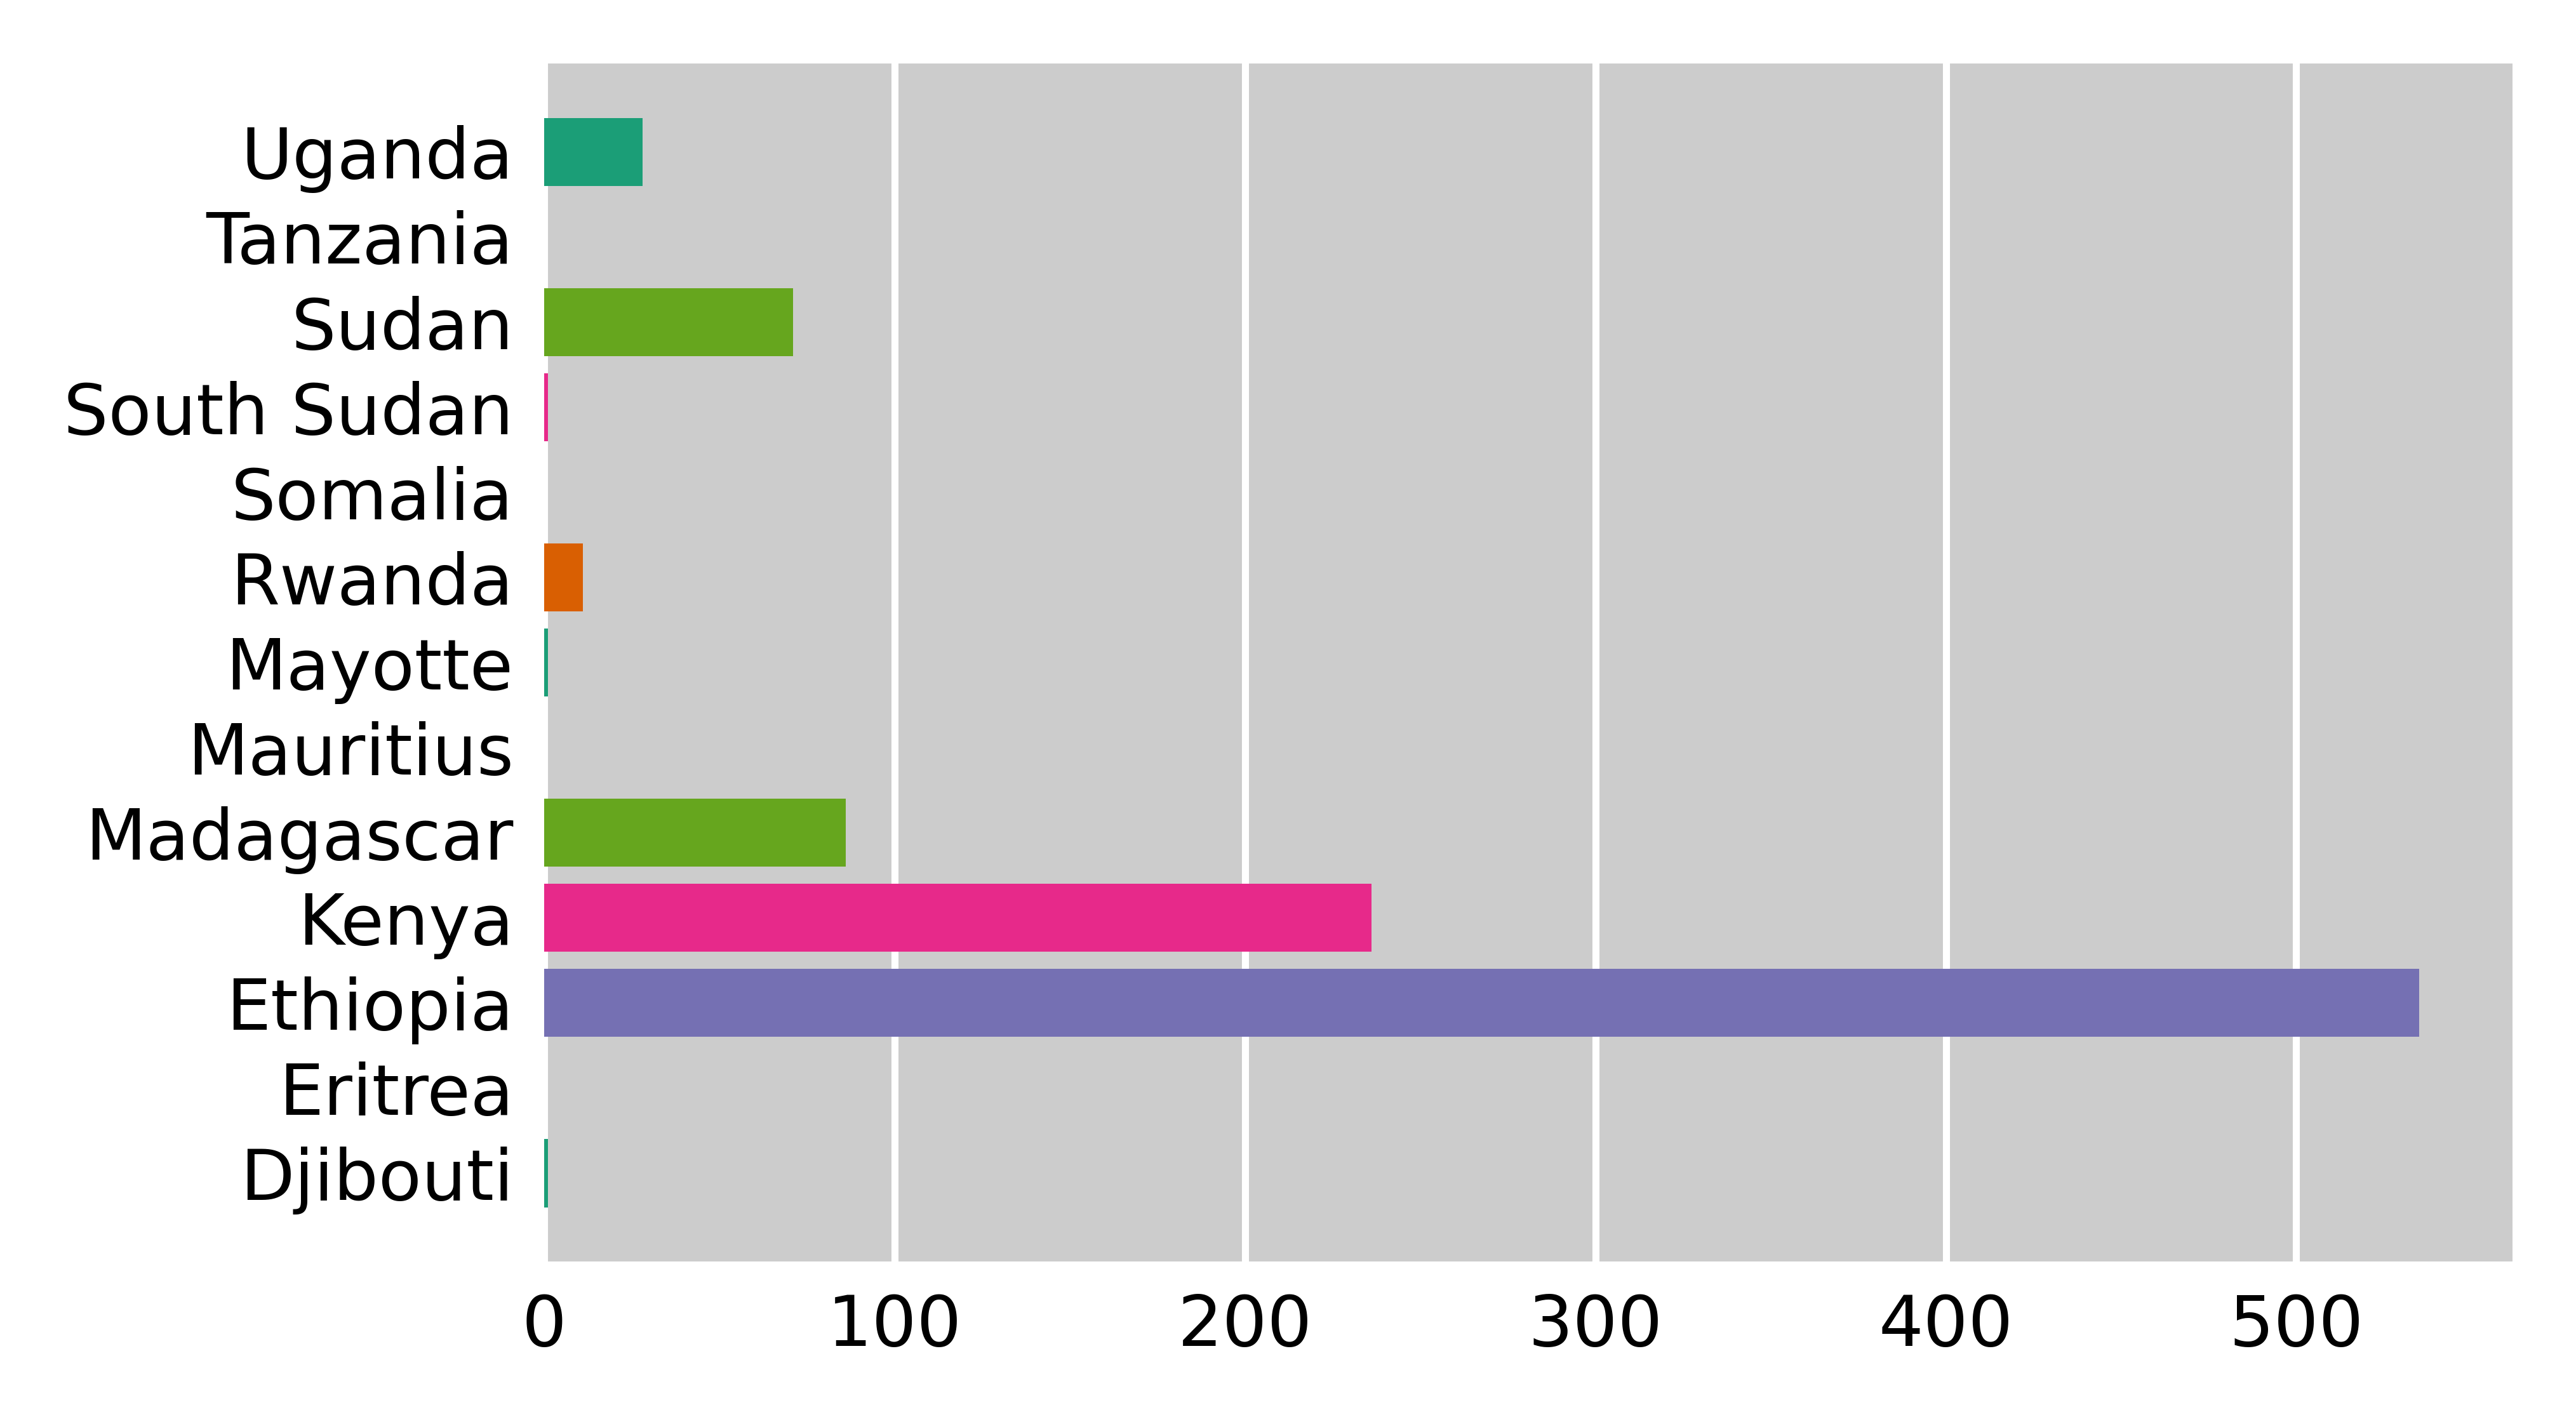

In [4]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

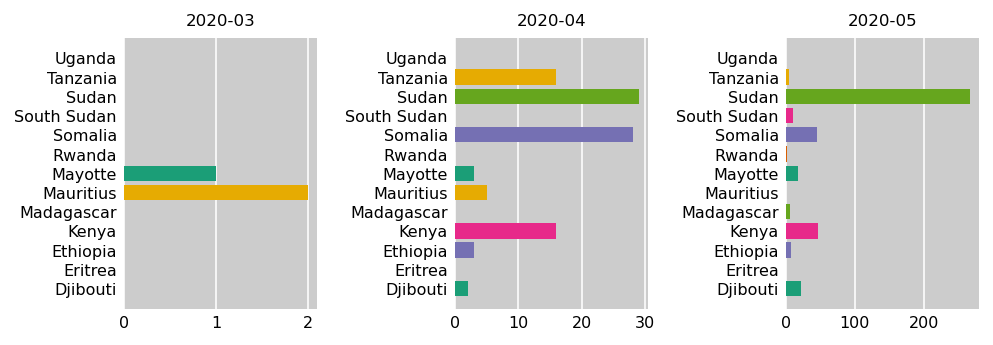

In [5]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), 
                             dpi=144, tight_layout=True)
dates = ['2020-03', '2020-04', '2020-05']
for ax, date in zip(ax_array, dates):
    s = df.loc[date]
    y = df.loc[date].rank(method='first')
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [6]:
df2 = df.loc['2020-02':'2021:5']
df2 = df2.reset_index()
df2.index = df2.index * 5

In [7]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded

COUNTRY_NAME,index,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
0,2020-03,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_expanded['index'] = df_expanded['index'].fillna(method='ffill')
df_expanded = df_expanded.set_index('index')
df_expanded

COUNTRY_NAME,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
index,,,,,,,,,,,,,
2020-03,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

COUNTRY_NAME,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
index,,,,,,,,,,,,,
2020-03,1.0,2.0,3.0,4.0,5.0,13.0,12.0,6.0,7.0,8.0,9.0,10.0,11.0
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_expanded = df_expanded.interpolate()
df_expanded

COUNTRY_NAME,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
index,,,,,,,,,,,,,
2020-03,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.4,0.0,0.6,3.2,0.0,2.6,1.4,0.0,5.6,0.0,5.8,3.2,0.0
2020-03,0.8,0.0,1.2,6.4,0.0,3.2,1.8,0.0,11.2,0.0,11.6,6.4,0.0
2020-03,1.2,0.0,1.8,9.6,0.0,3.8,2.2,0.0,16.8,0.0,17.4,9.6,0.0
2020-03,1.6,0.0,2.4,12.8,0.0,4.4,2.6,0.0,22.4,0.0,23.2,12.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04,59.0,0.0,665.2,468.2,179.2,4.0,6.4,22.4,147.2,2.4,203.2,0.0,5.6
2021-04,45.0,0.0,508.4,365.4,137.4,3.0,4.8,16.8,110.4,1.8,152.4,0.0,4.2
2021-04,31.0,0.0,351.6,262.6,95.6,2.0,3.2,11.2,73.6,1.2,101.6,0.0,2.8


In [11]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

COUNTRY_NAME,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
index,,,,,,,,,,,,,
2020-03,1.0,2.0,3.0,4.0,5.0,13.0,12.0,6.0,7.0,8.0,9.0,10.0,11.0
2020-03,2.0,1.8,3.8,5.2,4.4,12.2,11.2,5.4,8.0,7.2,9.8,10.2,9.8
2020-03,3.0,1.6,4.6,6.4,3.8,11.4,10.4,4.8,9.0,6.4,10.6,10.4,8.6
2020-03,4.0,1.4,5.4,7.6,3.2,10.6,9.6,4.2,10.0,5.6,11.4,10.6,7.4
2020-03,5.0,1.2,6.2,8.8,2.6,9.8,8.8,3.6,11.0,4.8,12.2,10.8,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04,8.4,1.0,12.8,12.2,10.2,3.6,5.4,6.4,8.2,3.6,10.2,3.2,5.8
2021-04,8.8,1.0,12.6,12.4,10.4,3.2,4.8,5.8,7.4,4.2,9.4,4.4,6.6
2021-04,9.2,1.0,12.4,12.6,10.6,2.8,4.2,5.2,6.6,4.8,8.6,5.6,7.4


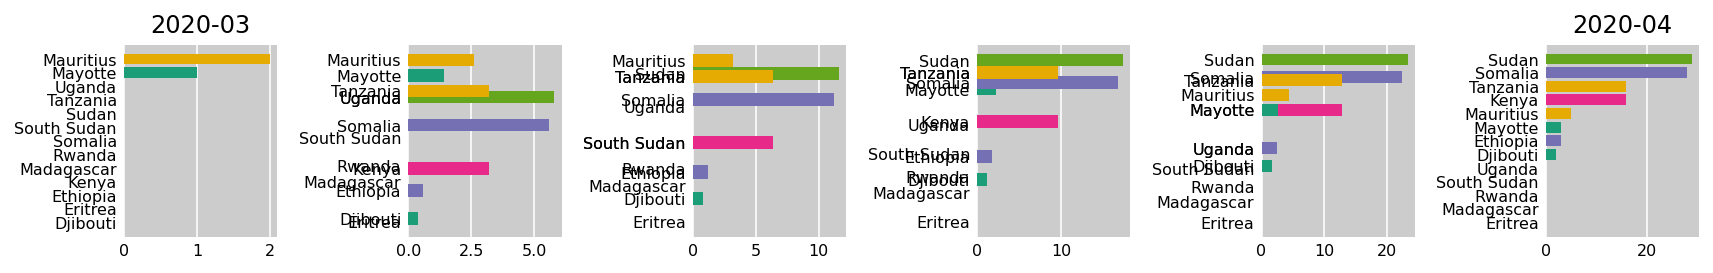

In [12]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03')
ax_array[-1].set_title('2020-04');

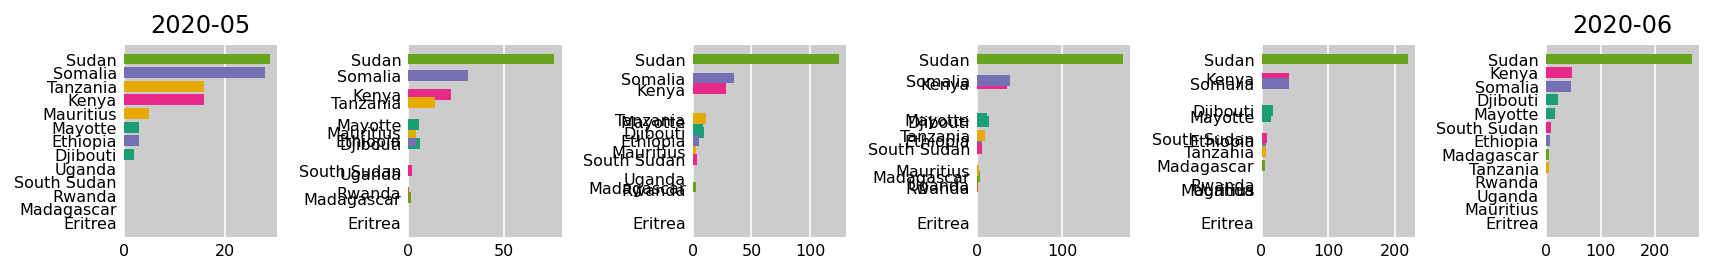

In [13]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=5):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-05')
ax_array[-1].set_title('2020-06');

In [14]:
def prepare_data(df, steps=20):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['index'] = df_expanded['index'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('index')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

COUNTRY_NAME,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
index,,,,,,,,,,,,,
2020-03,0.0,0.0,0.00,0.0,0.0,2.00,1.0,0.0,0.0,0.0,0.00,0.0,0.0
2020-03,0.1,0.0,0.15,0.8,0.0,2.15,1.1,0.0,1.4,0.0,1.45,0.8,0.0
2020-03,0.2,0.0,0.30,1.6,0.0,2.30,1.2,0.0,2.8,0.0,2.90,1.6,0.0
2020-03,0.3,0.0,0.45,2.4,0.0,2.45,1.3,0.0,4.2,0.0,4.35,2.4,0.0
2020-03,0.4,0.0,0.60,3.2,0.0,2.60,1.4,0.0,5.6,0.0,5.80,3.2,0.0


In [15]:
df_rank_expanded.head()
df_rank_expanded

COUNTRY_NAME,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Mauritius,Mayotte,Rwanda,Somalia,South Sudan,Sudan,Tanzania,Uganda
index,,,,,,,,,,,,,
2020-03,1.00,2.00,3.00,4.00,5.00,13.0,12.00,6.00,7.00,8.00,9.0,10.00,11.0
2020-03,1.25,1.95,3.20,4.30,4.85,12.8,11.80,5.85,7.25,7.80,9.2,10.05,10.7
2020-03,1.50,1.90,3.40,4.60,4.70,12.6,11.60,5.70,7.50,7.60,9.4,10.10,10.4
2020-03,1.75,1.85,3.60,4.90,4.55,12.4,11.40,5.55,7.75,7.40,9.6,10.15,10.1
2020-03,2.00,1.80,3.80,5.20,4.40,12.2,11.20,5.40,8.00,7.20,9.8,10.20,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04,9.60,1.00,12.20,12.80,10.80,2.4,3.60,4.60,5.80,5.40,7.8,6.80,8.2
2021-04,9.70,1.00,12.15,12.85,10.85,2.3,3.45,4.45,5.60,5.55,7.6,7.10,8.4
2021-04,9.80,1.00,12.10,12.90,10.90,2.2,3.30,4.30,5.40,5.70,7.4,7.40,8.6


In [16]:
from IPython.display import HTML
import bar_chart_race as bcr
bcr.bar_chart_race(df, orientation='h', sort='desc', n_bars=5, shared_fontdict={'family' : 'Calibri', 'weight' : 'normal', 'color' : '.1'}, fixed_order=False, fixed_max=False, steps_per_period=20, period_length=2500, interpolate_period=False, label_bars=True, bar_size=0.5, period_label=True, period_fmt=None, period_summary_func=None, perpendicular_bar_func=None, figsize=(6, 3.5), cmap='dark24', title='Monthly Covid Deaths : East Africa', title_size=None, bar_label_size=7, tick_label_size=7, scale='log', writer=None, fig=None, dpi=144, bar_kwargs=None, filter_column_colors=False)


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
/home/brightkoech/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/brightkoech/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
